# The Code for deducing the equations of motions

First, run the following code for later convenience

In [1]:
FS = FullSimplify;
(* take the useful part of a eom *)
take[a_] := If[Head@a === Times, a[[-1]], a]; SetAttributes[take, Listable];
(* remove 0 from a list *)
no0 := Cases[Flatten[#], Except[0]] &;

## Description

Xi-Jing Wang, Guoyang Fu, Peng Liu, Xiao-Mei Kuang, Bin Wang and Jian-Pin Wu, arXiv : xxxx.xxxxx

Now, we shall derive the EOMs for the Einstein-scalar-Weyl theory Eq.(2).  As we discussed in the paper, this theory will lead to fourth-order differential equations. However, some studies have shown that it is possible to reduce these equations to second-order by eliminating the higher-derivative terms . 
In this notebook, we provide the process of the derivation both the fourth and second order differential equations, respectively. 

This notebook has also benefited from the [RG&TC Code](http://www.inp.demokritos.gr/~sbonano/RGTC/).

Load the RG&TC code

In [6]:
Get["./packages/RG&TC.wl"]

## The Steps for deducing the eoms

The below is the coordinate, metric setup, and all necessary tensors.

According to the setting in our paper, the equations to solve are $(U1,U2,\varphi)$

In [7]:
xCoord = {t, z, \[Theta], \[Phi]}; (* coordinates *)
g = {{-(1 - z) U1[z], 0, 0, 0}, {0, 1/z^4 1/((1 - z) U2[z]), 0, 0}, {0, 0, 1/z^2, 0}, {0, 0, 0, 1/z^2 Sin[\[Theta]]^2}};  (* metric *)

(* define the tensors *)
RGtensors[g, xCoord] 

gdd = 
 
>    



     (-1 + z) U1[z]     0                  0                  0


                               1
                        ----------------
                                 4
     0                  (1 - z) z  U2[z]   0                  0




                                            -2
     0                  0                  z                  0

                                                                           2
                                                              Sin[\[Theta]]
                                                              --------------
                                                                     2
     0                  0                  0                        z
                 2            2              2
  2   d[\[Theta]]    d[\[Phi]]  Sin[\[Theta]]                 2
ds  = ------------ + ------------------------- + (-1 + z) d[t]  U1[z] - 
            2                    2
           z                    z
 
 

The energy-momentum tensor

$$
T _ { \mu \nu } = 2 \nabla _ { \mu } \varphi \nabla _ { \nu } \varphi - g _ { \mu \nu } \nabla _ { \rho } \varphi \nabla ^ { \rho } \varphi + 4 \alpha B _ { \mu \nu }
$$

and the defined $B_{\mu\nu}$ tensor

$$
B _ { \mu \nu } =  F ( \varphi ) \left( \nabla ^ { \rho } \nabla ^ { \sigma } + \frac { 1 } { 2 } R ^ { \rho \sigma } \right) C _ { \mu \rho \nu \sigma } + \dot { F } ( \varphi ) \left( \nabla ^ { \rho } \varphi \nabla ^ { \sigma } \left( C _ { \mu \rho \nu \sigma } + C _ { \mu \sigma \nu \rho } \right) + \nabla ^ { \rho } \nabla ^ { \sigma } \varphi C _ { \mu \rho \nu \sigma } \right) + \ddot { F } ( \varphi ) \nabla ^ { \rho } \varphi \nabla ^ { \sigma } \varphi C _ { \mu \rho \nu \sigma } 
$$

In [11]:
B1dd = -4 \[Alpha] F[\[CurlyPhi][z]] (
  covDiv[covDiv[Raise[Wdddd, 1, 3], {1, {3}}], {1}] + 1/2 Contract[ Outer[Times, Raise[Rdd, 1, 2], Wdddd], {1, 4}, {2, 6}]
  );
B2dd = -4 \[Alpha] F'[\[CurlyPhi][z]] (
  (
  Contract[Outer[Times, Raise[covD[\[CurlyPhi][z]], 1], covDiv[Raise[-Wdddd, 1], {1}]], {1, 4}] + 
  Contract[Outer[Times, Raise[covD[\[CurlyPhi][z]], 1], covDiv[Raise[-Wdddd, 1], {1}]], {1, 4}]
  ) 
  + 
  Contract[Outer[Times, covD[covD[\[CurlyPhi][z]]],  Raise[Wdddd, 2, 4]], {1, 4}, {2, 6}]
  );
B3dd = -4 \[Alpha] F''[\[CurlyPhi][z]] (
  Contract[Outer[Times, covD[\[CurlyPhi][z]], covD[\[CurlyPhi][z]], Raise[Wdddd, 2, 4]], {1, 4}, {2, 6}]
  );
Tdd = -(
  (
    -2*Outer[Times, covD[\[CurlyPhi][z]], covD[\[CurlyPhi][z]]] + 
    gdd (Contract[Outer[Times, gUU . covD[\[CurlyPhi][z]], covD[\[CurlyPhi][z]]], {1, 2}])
  ) 
  + B1dd + B2dd + B3dd
  );

### Einstein equations

$$G_{ab} = T_{ab}$$

In [15]:
(* define the einstein equation *)
einsteinEQ = Rdd - 1/2 R*gdd - Tdd // Expand // Simplify // take;

### Klein-Gorden Equations

$$\nabla _ { \mu } \nabla ^ { \mu } \varphi - \frac { 1 } { 4 } \alpha \dot { F } ( \varphi ) C ^ { 2 } = 0$$

In [17]:
(* Weyl tensor *)
WUUUU := Raise[Wdddd, 1, 2, 3, 4]
(* W^2 *)
weyl = Contract[Outer[Times, WUUUU, Wdddd], {1, 5}, {2, 6}, {3, 7}, {4, 8}];
(* Scalar euqation of motion *)
scalarEQ = Contract[Raise[covD[covD[\[CurlyPhi][z]]], 1], {1, 2}] - \[Alpha]/4 F'[\[CurlyPhi][z]]*weyl // Together // FS // take;

### Now all the eoms are

In [23]:
eq = einsteinEQ // no0; (* remove 0 from the einstein equation *)

In [25]:
(* The length of eq *)
eq//Length
(* The unique length of eq *)
eq//Union//Length

4
3

Apparently, only 3 equations are independent. So we define.

In [28]:
{eq1, eq2, eq3} = Union @ eq;
eq4 = scalarEQ;

But we only need to solve 3 equations, since we only have 3 variables to solve.

## The fourth-order eoms

We take the rest 3 equations to solve the equations. The validity of this choice can be checked by introducing the solution back to the discarded first equation.

2  6                2       4
{-49 (-1 + z)  z  α F[φ[z]] U2[z]  U1'[z]  + 
 
                 5                     2
>    2 (-1 + z) z  α U1[z] U2[z] U1'[z]  
 
>     (16 (-1 + z) z U2[z] F'[φ[z]] U1'[z] φ'[z] + 
 
>       F[φ[z]] (29 (-1 + z) z U1'[z] U2'[z] + 
 
>          U2[z] (47 (-2 + 3 z) U1'[z] + 58 (-1 + z) z U1''[z]))) - 
 
      4        2
>    z  α U1[z]  (4 (-1 + z) z U2[z] U1'[z] 
 
>        (9 (-1 + z) z F'[φ[z]] U1'[z] U2'[z] φ'[z] + 
 
                                           2
>          U2[z] (2 (-1 + z) z U1'[z] φ'[z]  F''[φ[z]] + 
 
>             F'[φ[z]] (16 (-1 + z) z φ'[z] U1''[z] + 
 
>                U1'[z] (17 (-2 + 3 z) φ'[z] + 2 (-1 + z) z φ''[z])))) + 
 
                           2  2       2       2
>       F[φ[z]] (9 (-1 + z)  z  U1'[z]  U2'[z]  + 
 
>          12 (-1 + z) z U2[z] U1'[z] 
 
>           (9 (-1 + z) z U2'[z] U1''[z] + 
 
>             U1'[z] (9 (-2 + 3 z) U2'[z] + 2 (-1 + z) z U2''[z])) + 
 
                2                      2        2              2  2        2
>          U2[z]  ((204 - 716 z + 537 z ) U1'[z]  + 36 (-1 + z)  z  U1''[z]  + 
 
                                                                           (3)
>             4 (-1 + z) z U1'[z] (41 (-2 + 3 z) U1''[z] + 12 (-1 + z) z U1   [z])))) + 
 
          4                          2             4
>    U1[z]  (4 (-6 - 6 z U2'[z] + 6 z  U2'[z] - 4 z  α F'[φ[z]] U2'[z] φ'[z] + 
 
              5                              5                  2
>          4 z  α F'[φ[z]] U2'[z] φ'[z] + 2 z  α F'[φ[z]] U2'[z]  φ'[z] - 
 
              6                  2            7                  2
>          5 z  α F'[φ[z]] U2'[z]  φ'[z] + 3 z  α F'[φ[z]] U2'[z]  φ'[z] + 
 
              3        2                    2       2
>          4 z  α U2[z]  (2 z (1 - 4 z + 3 z ) φ'[z]  F''[φ[z]] + 
 
                                        2                            2
>             F'[φ[z]] ((2 - 21 z + 21 z ) φ'[z] + 2 z (1 - 4 z + 3 z ) φ''[z])) + 
 
                                  2      2
>          U2[z] (6 + 2 (-1 + z) z  φ'[z]  
 
                      2
>              (-3 + z  α (4 + z (-2 + 3 z) U2'[z]) F''[φ[z]]) + 
 
               3                                        2
>             z  α F'[φ[z]] (φ'[z] (z (32 - 124 z + 93 z ) U2'[z] + 
 
                                                2
>                   4 (-2 + 3 z) (1 + (-1 + z) z  U2''[z])) + 
 
>                2 (-1 + z) z (4 + z (-2 + 3 z) U2'[z]) φ''[z]))) + 
 
         2                         2    2                  2        2
>       z  α F[φ[z]] (16 - 16 U2[z]  + z  (20 - 84 z + 63 z ) U2'[z]  + 
 
              3               2
>          4 z  (2 - 5 z + 3 z ) U2'[z] U2''[z] + 
 
                                        2
>          4 z U2[z] (4 (2 - 27 z + 27 z ) U2'[z] + 
 
                                  2                              2    (3)
>             z ((20 - 76 z + 57 z ) U2''[z] + 2 z (2 - 5 z + 3 z ) U2   [z])))) + 
 
        4        3             2  2                       2
>    2 z  α U1[z]  (2 ((-1 + z)  z  F'[φ[z]] U1'[z] U2'[z]  φ'[z] + 
 
                                                             2
>          2 (-1 + z) z U2[z] ((-1 + z) z U1'[z] U2'[z] φ'[z]  F''[φ[z]] + 
 
>             F'[φ[z]] (7 (-1 + z) z U2'[z] φ'[z] U1''[z] + 
 
>                U1'[z] (2 (-1 + z) z φ'[z] U2''[z] + 
 
>                   U2'[z] (10 (-2 + 3 z) φ'[z] + (-1 + z) z φ''[z])))) + 
 
                2                    2
>          U2[z]  (2 (-1 + z) z φ'[z]  F''[φ[z]] 
 
>              ((-6 + 9 z) U1'[z] + 2 (-1 + z) z U1''[z]) + 
 
                                                   2
>             F'[φ[z]] (3 U1'[z] ((12 - 44 z + 33 z ) φ'[z] + 
 
                                      2
>                   2 z (2 - 5 z + 3 z ) φ''[z]) + 
 
>                2 (-1 + z) z (2 (-1 + z) z U1''[z] φ''[z] + 
 
                                                                  (3)
>                   φ'[z] (11 (-2 + 3 z) U1''[z] + 4 (-1 + 
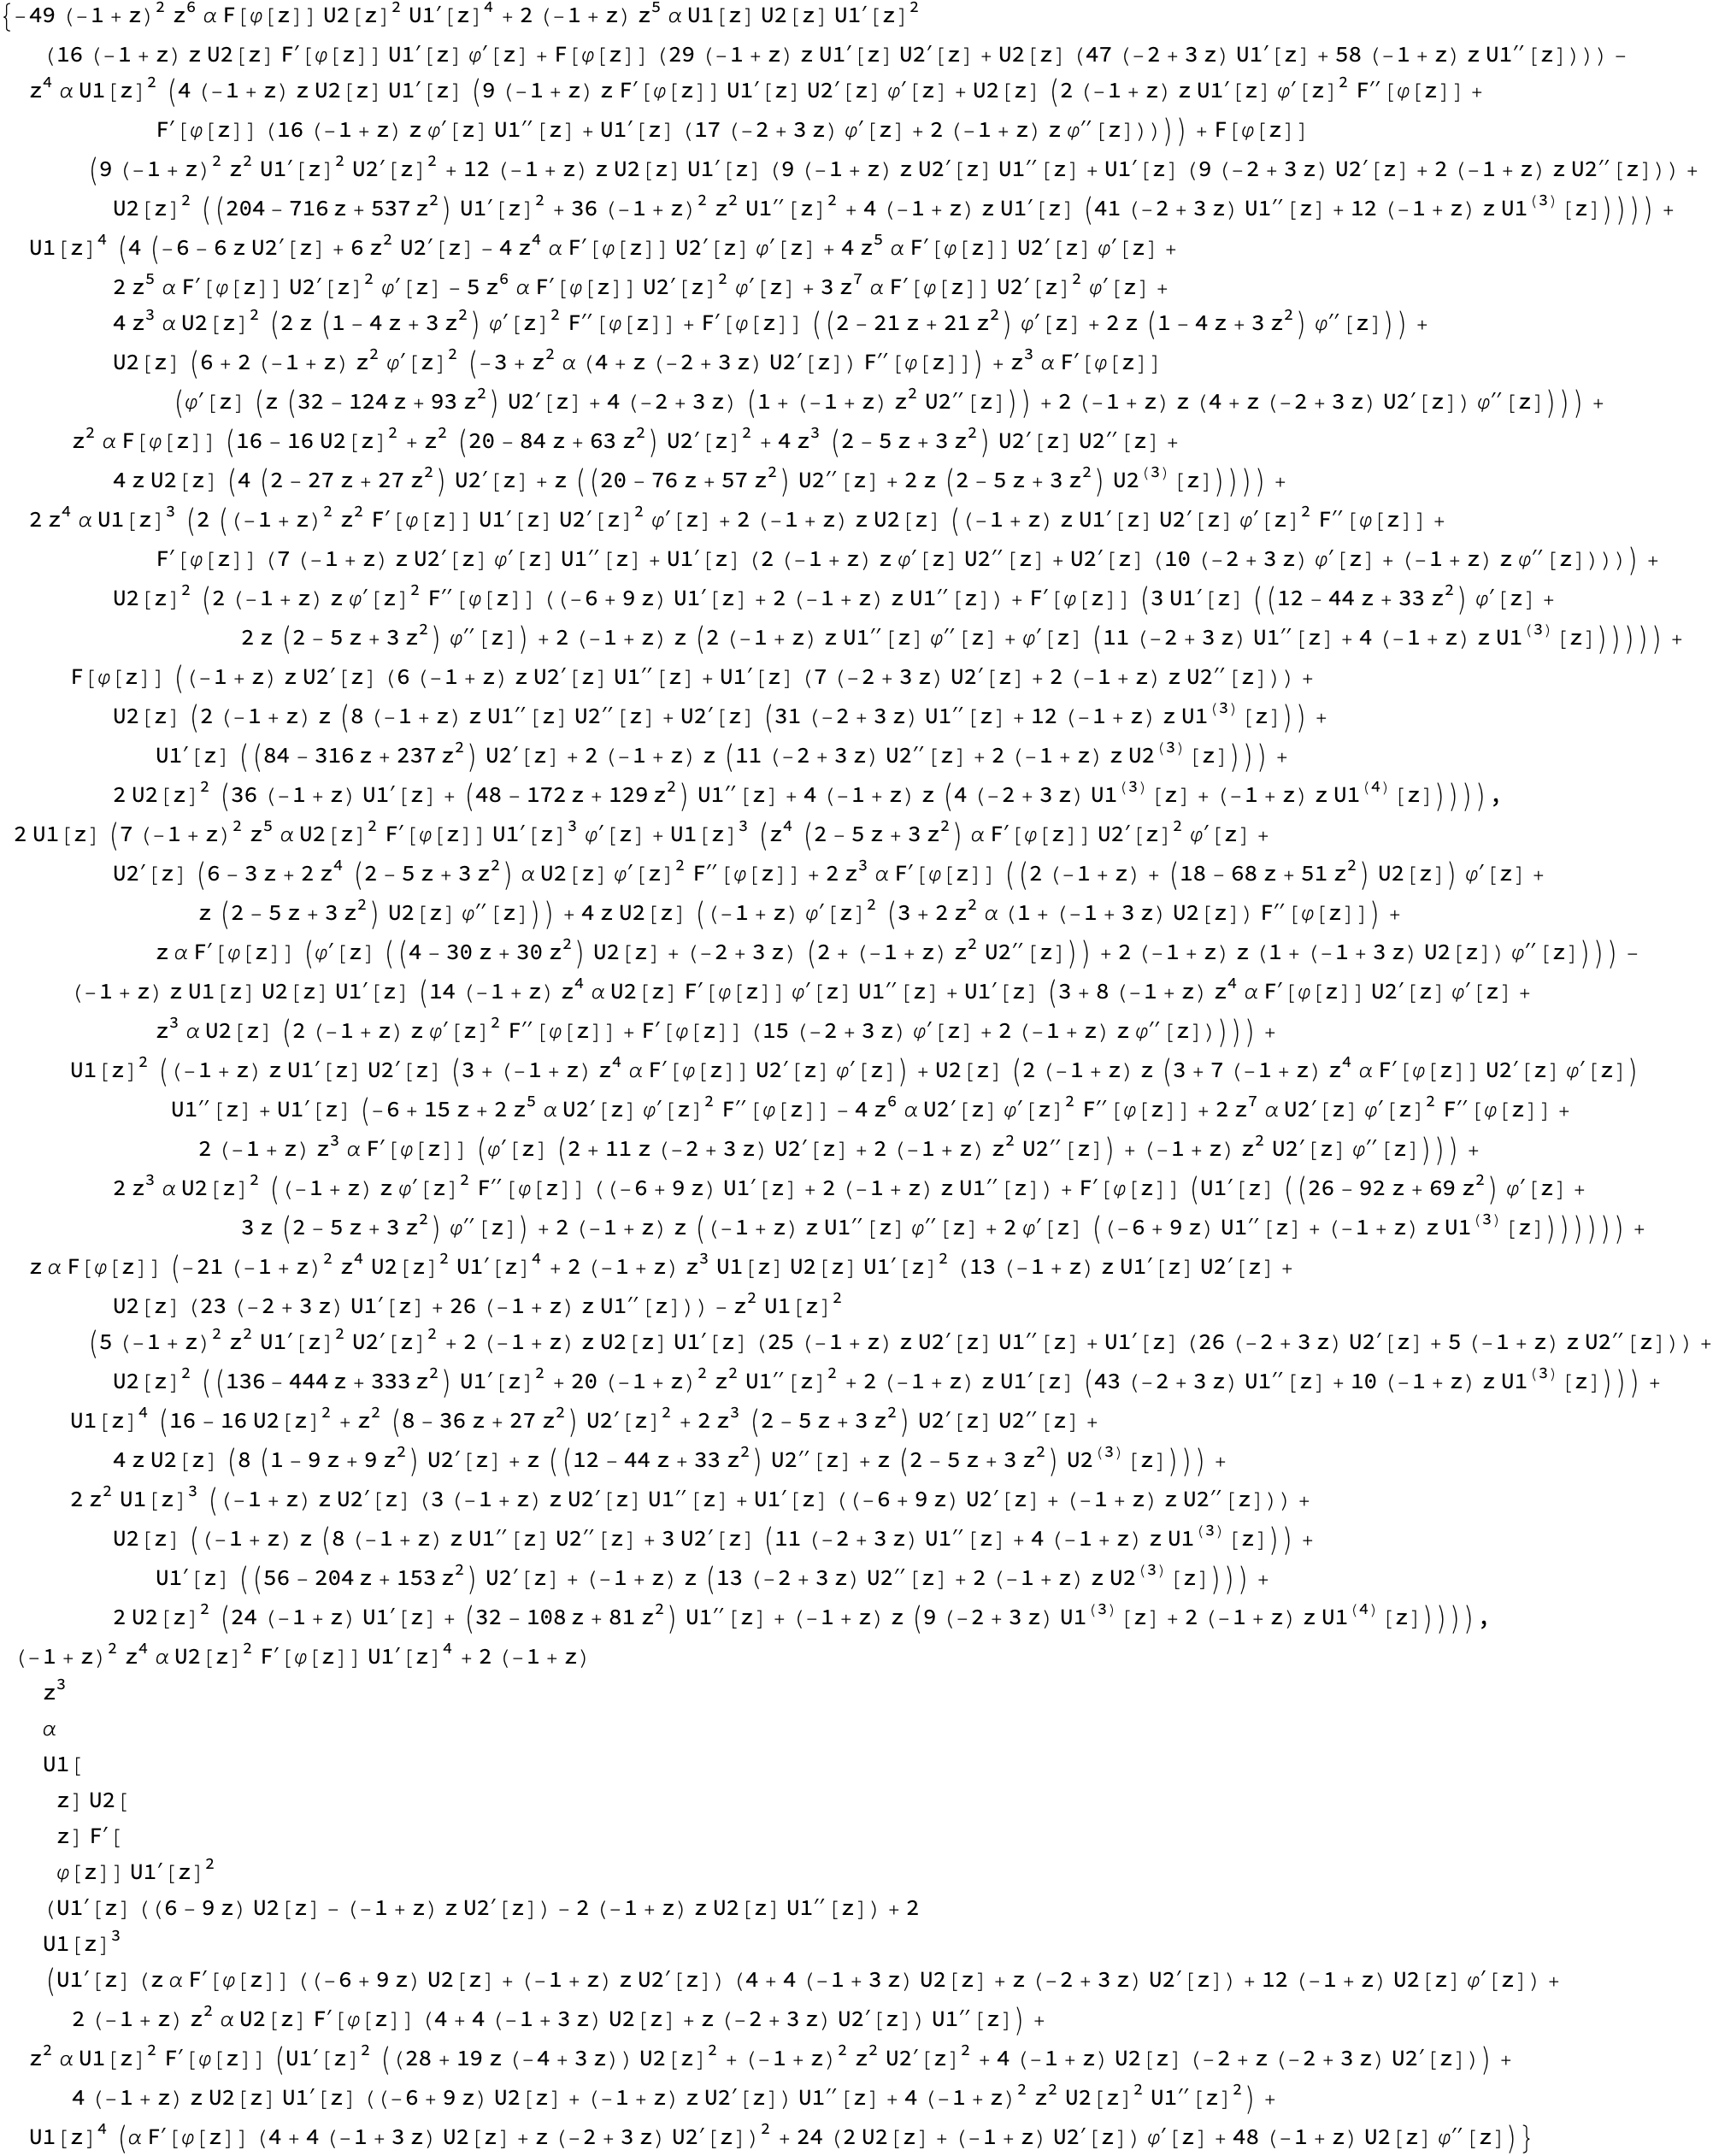

In [30]:
alleomOrder4 = {eq2, eq3, eq4} // Simplify // take

we could output this to a file

In [31]:
alleomOrder4 >> "./eoms/alleomOrder4"

## The second order equations of motion

get the first eom

6                3      2       7                3      2
16 z  α F[φ[z]] U1[z]  U2[z]  - 32 z  α F[φ[z]] U1[z]  U2[z]  + 
 
        8                3      2
>   16 z  α F[φ[z]] U1[z]  U2[z]
    6                3      2       7                3      2
16 z  α F[φ[z]] U1[z]  U2[z]  - 32 z  α F[φ[z]] U1[z]  U2[z]  + 
 
        8                3      2
>   16 z  α F[φ[z]] U1[z]  U2[z]
0
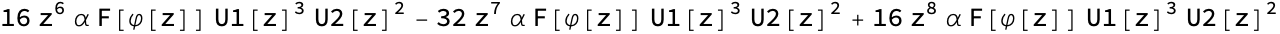
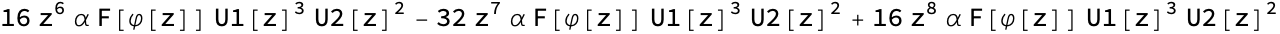

In [33]:
(* Get the Coefficients of 4-th derivative of the equations to cancel this higher derivative term *)
Coefficient[eq2, U1''''[z]]
Coefficient[2 z eq3, U1''''[z]] // Expand
%% - %

{z, α, F[φ[z]], U2[z], U1'[z], U1[z], F'[φ[z]], φ'[z], U2'[z], U1''[z], U2''[z], 
 
      (3)
>   U1   [z]}
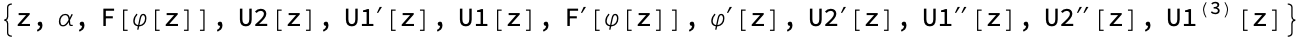

In [36]:
eq1//Variables

2             2         2
-((-1 + z) z  U2[z] U1'[z] ) + U1[z]  
 
                                                       2      2
>    (4 + (4 - 3 z) z U2'[z] + 4 U2[z] (-1 + (-1 + z) z  φ'[z] )) + 
 
     2
>   z  U1[z] ((-1 + z) U1'[z] U2'[z] + U2[z] (3 U1'[z] + 2 (-1 + z) U1''[z]))
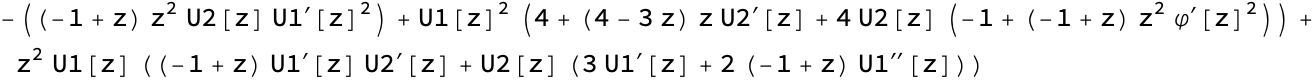

In [37]:
EQ1 = eq2 - 2 z eq3 /. Solve[eq1 == 0, U1'''[z]][[1,1]] // Simplify // take

### The second equation of motion

In [38]:
U1O2sol = Solve[EQ1 == 0, U1''[z]][[1]] // Simplify;

2  2        2                2
9 (-1 + z)  z  α U2[z]  F'[φ[z]] U1'[z]  - 
 
                                                2
>   6 (-1 + z) U1[z] U2[z] U1'[z] (-3 (-1 + z) z  α F'[φ[z]] U2'[z] - φ'[z] + 
 
          2                                        2
>      2 z  α U2[z] F'[φ[z]] (-3 + (-1 + z) z φ'[z] )) + 
 
         2                                 2
>   U1[z]  (3 (-1 + z) U2'[z] (3 (-1 + z) z  α F'[φ[z]] U2'[z] + 2 φ'[z]) + 
 
          2        2                                2 2
>      4 z  α U2[z]  F'[φ[z]] (-3 + (-1 + z) z φ'[z] )  - 
 
                                    2                                         2
>      12 U2[z] (-φ'[z] + (-1 + z) z  α F'[φ[z]] U2'[z] (-3 + (-1 + z) z φ'[z] ) + 
 
>         φ''[z] - z φ''[z]))
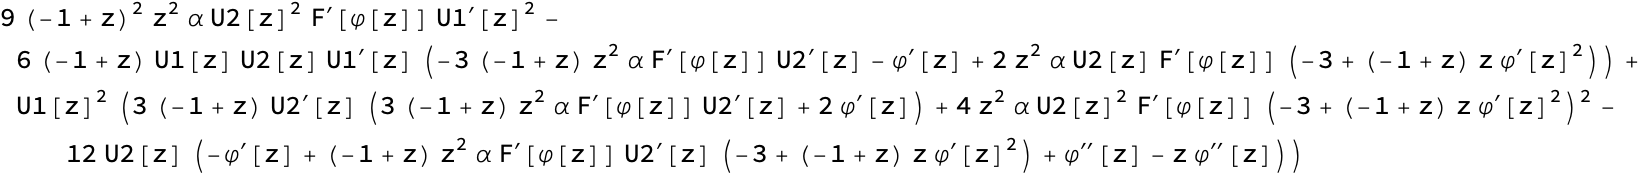

In [39]:
EQ2 = (scalarEQ /. U1O2sol) // Simplify // take

### The third equation of motion

In [40]:
\[CurlyPhi]2sol = Solve[EQ2 == 0, \[CurlyPhi]''[z]][[1, 1]] // Simplify;
U1O3sol = D[U1O2sol[[1]], z] // Simplify;

2  5                2       3
U1[z] (9 (-1 + z)  z  α F[φ[z]] U2[z]  U1'[z]  
 
                         3
>      (-1 + 2 (-1 + z) z  α U2[z] F'[φ[z]] φ'[z]) - 
 
                  4                     2
>     3 (-1 + z) z  α U1[z] U2[z] U1'[z]  
 
>      (-6 (-1 + z) z U2[z] F'[φ[z]] φ'[z] + 
 
>        F[φ[z]] (-3 (-1 + z) z U2'[z] + 
 
                                          2  4
>           U2[z] (-9 + 15 z - 12 (-1 + z)  z  α F'[φ[z]] U2'[z] φ'[z] - 
 
                           2      2
>              4 (-1 + z) z  φ'[z] ) + 
 
                        3        2                                        2      2
>           2 (-1 + z) z  α U2[z]  F'[φ[z]] φ'[z] (6 - 21 z + 4 (-1 + z) z  φ'[z] ))) + 
 
             2
>     z U1[z]  U2[z] U1'[z] (-6 (-1 + z) 
 
                            4
>         (-3 - 3 (-1 + z) z  α F'[φ[z]] U2'[z] φ'[z] + 
 
             3                                                2      2
>           z  α U2[z] F'[φ[z]] φ'[z] (6 - 15 z + 2 (-1 + z) z  φ'[z] )) + 
 
          3                        3        2
>        z  α F[φ[z]] (8 (-1 + z) z  α U2[z]  F'[φ[z]] φ'[z] 
 
                                             2       2           2  3      4
>            (-18 + 36 z - 3 z (2 - 7 z + 5 z ) φ'[z]  + (-1 + z)  z  φ'[z] ) - 
 
                                     2      2      3      2
>           3 U2[z] (-12 + 15 z + 8 z  φ'[z]  - 8 z  φ'[z]  + 
 
                         2  3                                                 2      2
>              4 (-1 + z)  z  α F'[φ[z]] U2'[z] φ'[z] (6 - 15 z + 2 (-1 + z) z  φ'[z] ))\
 
                                                        2  4                  2
>            + 18 (-1 + z) ((-1 + 4 z) U2'[z] + (-1 + z)  z  α F'[φ[z]] U2'[z]  φ'[z] + 
 
>              (-1 + z) z U2''[z]))) + 
 
           3                    3
>     U1[z]  (-9 (2 + (-1 + z) z  α F[φ[z]] U2'[z] (-4 + 3 (-1 + z) z U2'[z])) + 
 
            7             2              3                                      2 2
>        8 z  (-2 + 3 z) α  F[φ[z]] U2[z]  F'[φ[z]] φ'[z] (-3 + (-1 + z) z φ'[z] )  - 
 
             2        2   2                                                 2
>        12 z  α U2[z]  (z  (-2 + 3 z) F'[φ[z]] φ'[z] (-3 + (-1 + z) z φ'[z] ) + 
 
                                2                 2       2           2  4      4
>           F[φ[z]] (6 - 3 z + z  (10 - 17 z + 6 z ) φ'[z]  + (-1 + z)  z  φ'[z]  + 
 
                  5               2                                                2
>              2 z  (2 - 5 z + 3 z ) α F'[φ[z]] U2'[z] φ'[z] (-3 + (-1 + z) z φ'[z] )))\
 
                             4               2
>         + 3 U2[z] (6 (1 + z  (2 - 5 z + 3 z ) α F'[φ[z]] U2'[z] φ'[z] + 
 
                         2      2
>              (-1 + z) z  φ'[z] ) + 
 
             2
>           z  α F[φ[z]] (24 - 12 z + 
 
                         2  5                             2
>              6 (-1 + z)  z  (-2 + 3 z) α F'[φ[z]] U2'[z]  φ'[z] - 
 
                           2      2
>              8 (-1 + z) z  φ'[z]  + 
 
                                           2             2  2      2
>              3 z U2'[z] (12 - 28 z + 21 z  + 4 (-1 + z)  z  φ'[z] ) + 
 
                  2               2
>              6 z  (2 - 5 z + 3 z ) U2''[z]))))
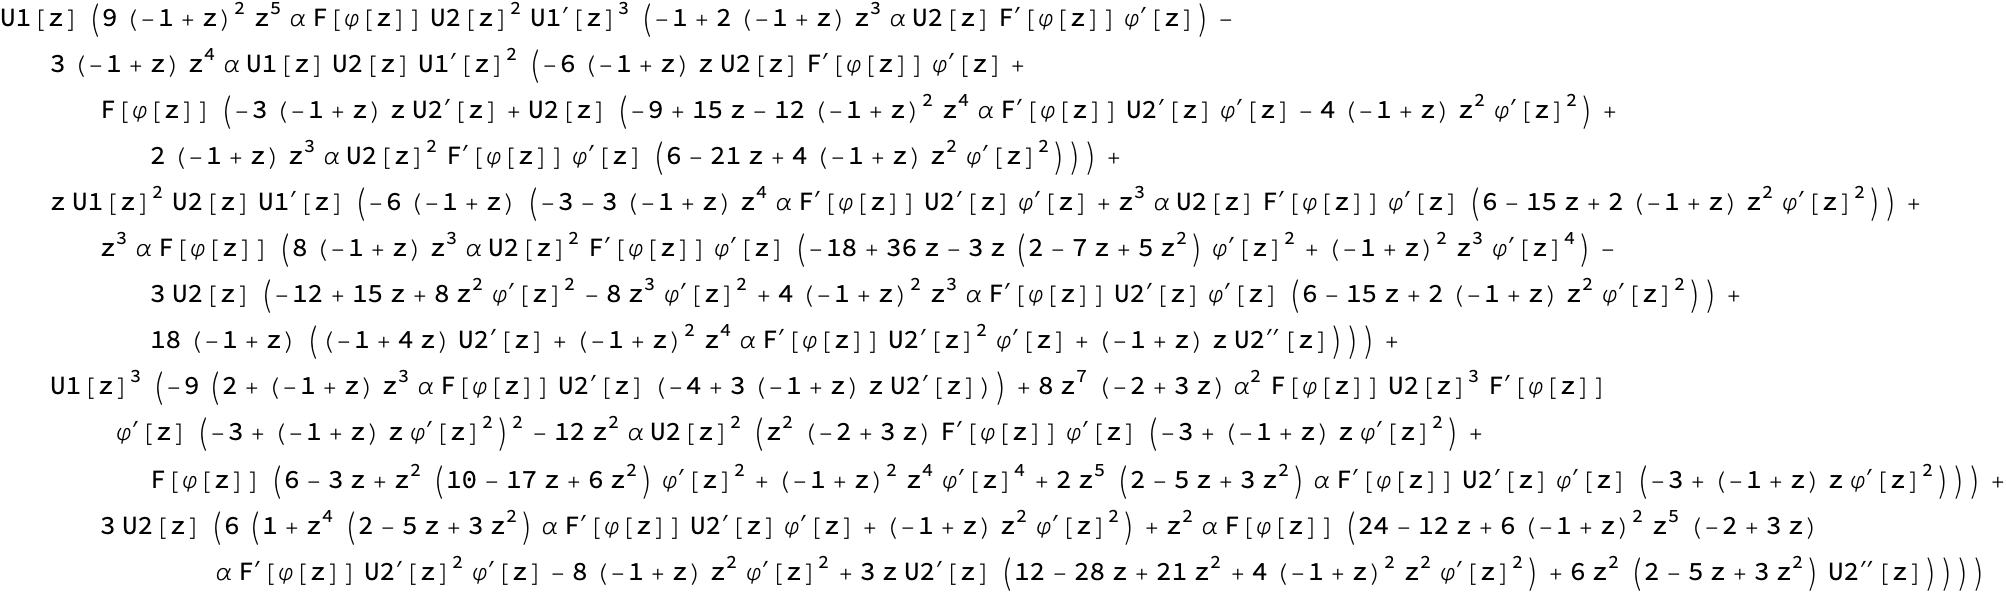

In [43]:
EQ3 = eq1 /. U1O3sol /. U1O2sol /. \[CurlyPhi]2sol // Together // take // Simplify

### The final results of the second order equation of motions

In [44]:
alleomOrder2 = Join[{EQ1, EQ3, EQ2}];

In [45]:
alleomOrder2 >> "./eoms/alleomOrder2"